In [57]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

In [58]:
## reading data
data = pd.read_csv("data.csv")
data.head()

,Feature 1,Feature 2,Feature 3,Target
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [59]:
# checking NaN values in each columns  
data.isnull().sum()

Feature 1    0
Feature 2    0
Feature 3    0
Target       0
dtype: int64

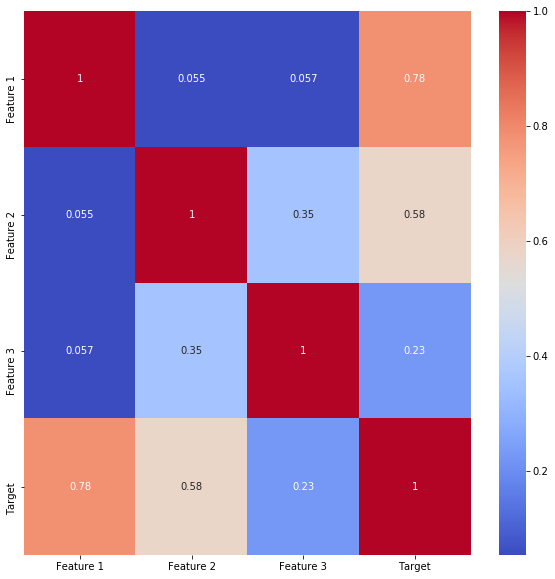

In [60]:
#Finding corelation between features
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,cmap="coolwarm")

In [61]:
# sepating target vaiable from data
output=data.Target
inputs=data.drop('Target',axis=1)
inputs

,Feature 1,Feature 2,Feature 3
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [62]:
#splitting data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(inputs,output,test_size=0.2)                                                   

In [63]:
#Training ML model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
model.score(X_test, y_test)

0.9253585665581965

In [31]:
y_pred = model.predict(X_test)

In [65]:
error = y_test - y_pred

### Normal distribution of residuals(errors)

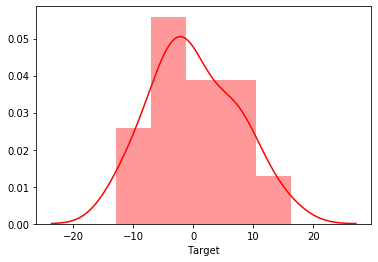

In [66]:
sns.distplot(error,color='red')

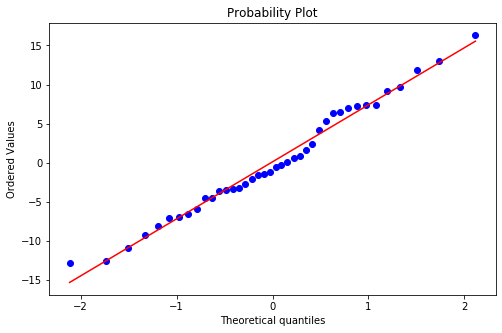

In [67]:
##Q-Q plot
import scipy as sp

fig, ax = plt.subplots(figsize=(8,5))
sp.stats.probplot(error, plot=ax, fit=True)
plt.show()

### Homoscedasticity

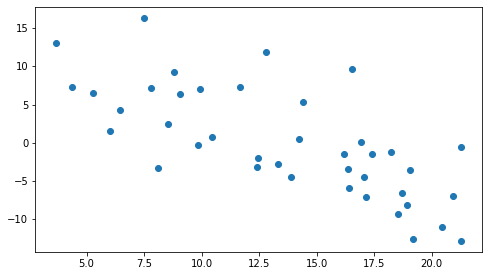

In [71]:
plt.figure(figsize=(8,4.5))
plt.scatter(y_pred, error)

### No autocorrelation of residuals

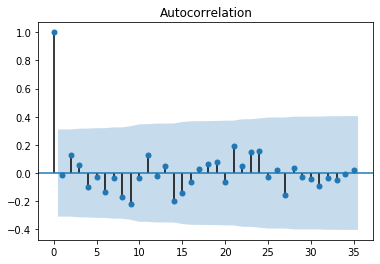

In [69]:
import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(error,lags=35, alpha=0.05)
acf.show()